In [285]:
# Packages and functions in order of use
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from matplotlib.pyplot import imread
from skimage.color import rgb2gray
from skimage import exposure
from skimage import filters
from skimage import io
import random
from scipy import stats

### Part 1

- privately, you need to record yourself saying this word. Please be clear and loud enough. Probably the easiest would be to record it with the Voice Recorder program on your phone.
- after the recording, you need to download the recorded file and upload it to JHUB in the ".wav" format. If your voice recorder stores files in another format (e.g. ".aac" etc.) use some online file converter in the Internet to convert it to ".wav". To upload the file to JHUB use the "upload" button on the top right of the JHUB file browser.
- load the file into a notebook using scipy (search how to read wav files). Look at dimensions, discover how many channels are in the recording. Select one channel for further work, this will be your recorded signal.
- play the recording using Audio class from IPython (we used it in the lectures). Make sure the word sounds loud and clear. If not, just record it once more.
- plot the recorded voice signal using matplotlib. Use wide figure size (15 inches or so).
- compute Fast-Fourier transform of the recorded signal. Plot Power Spectrum of the signal, use wide figure size as before. Which frequencies are most present in your recording?
- now your goal is to remove some of the frequencies such that one can still hear the word, but it's pretty hard to recognise. Use Butterworth filter to remove some frequency band(s). You can filter multiple frequency ranges by applying the filter a few times.
- plot the Power spectrum of the modified recording. Make sure that the filtered frequencies are gone.
- play the modified recording with IPython Audio. The word should be still there, but hard to recognise.
- use IPython Audio to speak out the modified recording to Google Translate (there is a microphone function to recognise spoken words, just on your phone). Make sure Google still able to do it.
- if you are fine with the modified recording (hard to recognise for a human, but still works with Google) - save the modified recording to a ".wav" file and send it to your parter.

In [286]:
# I load the file into the notebook using "wavfile" of the modul ".io" in the package "scipy"
audio_file = "Python-PING-PONG.wav"

# Loading the .wav file divided in sample rate and the file itself
sample_rate, audio_data = wavfile.read(audio_file)

In [287]:
# I look at the dimensions of the file and find that there is only ONE channel
audio_data.shape

(108544,)

In [288]:
# I play the recording using "Audio" of the modul ".display" in the package "IPython"
Audio(audio_data, rate = sample_rate)

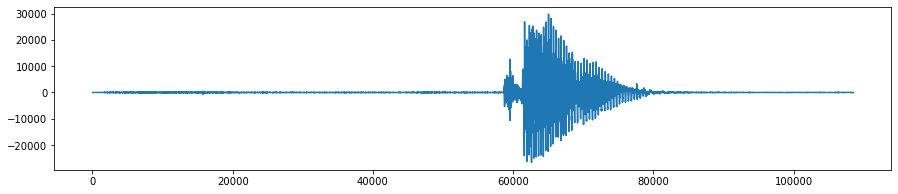

In [289]:
# I plot the recorded voice signal using the modul ".pyplot" in the package "matplotlib"
fig, ax = plt.subplots(1, 1, figsize = (15, 3))
ax.plot(audio_data)
plt.show()

/opt/conda/envs/biokurs/lib/python3.8/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/opt/conda/envs/biokurs/lib/python3.8/site-packages/matplotlib/text.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  y = float(self.convert_yunits(y))


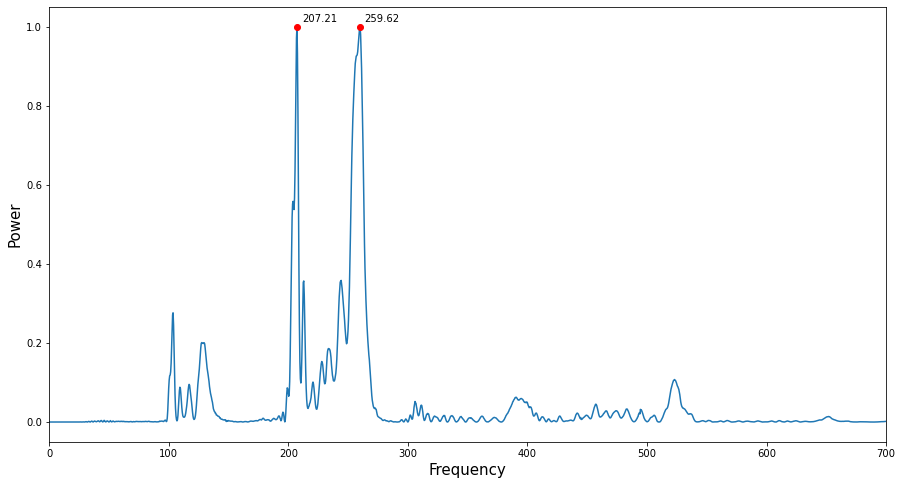

In [290]:
# I compute Fast-Fourier transform of the recorded audio using the package "numpy" and plot Power Spectrum of the signal to find out which 
# frequencies are the most present in the recording

# Going into Fourier (frequency domain)
audio_signal = audio_data
FFT          = np.fft.fft(audio_signal)  # fast fourier transform

# Computing and plotting power (strength) of different frequencies found in the signal
nyquist           = sample_rate / 2
x_freq            = np.linspace(0, nyquist, int(len(audio_signal)/2))
half_FFT          = FFT[:len(x_freq)]
complex_conjugate = np.conj(half_FFT)
power             = half_FFT * complex_conjugate

# Plot
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
ax.plot(x_freq, power / power.max())
ax.set_xlim(0, 700)
plt.xlabel('Frequency', size = 15)
plt.ylabel('Power', size = 15)

# I look for the indexes of the maximum values
max_indices = np.argsort(power)[-2:]  # Índices de los dos valores más grandes

# I mark the maximum values on the graph and label them on the X-axis.
for index in max_indices:
    ax.plot(x_freq[index], power[index] / power.max(), 'ro')
    ax.annotate(f"{x_freq[index]:.2f}", xy=(x_freq[index], power[index] / power.max()),
                xytext=(5, 5), textcoords = 'offset points')

In [291]:
# I remove some of the frequencies such that one can still hear the word, but it's pretty hard to recognise
# Creating the filter using "signal" of the package "scipy"
low_cut  = 50 # Hz
high_cut = 500 # Hz

sos = signal.butter(6, 
                    [low_cut / (0.5 * sample_rate), high_cut / (0.5 * sample_rate)], 
                    analog = False, 
                    btype  = 'band', 
                    output = 'sos')

In [292]:
# I now apply it to the original signal and get the result
audio_signal_filtered = signal.sosfilt(sos, audio_signal)

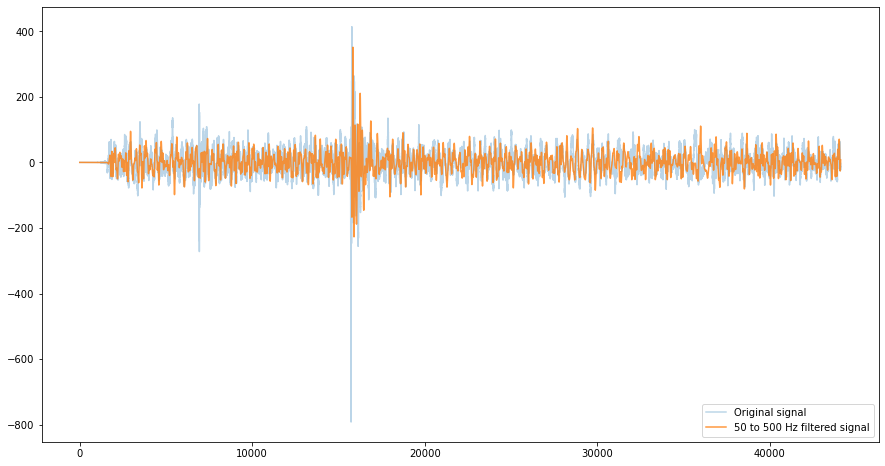

In [293]:
# I plot the first second of the original signal with the filtered one on top
fig, ax = plt.subplots(1, 1, figsize = (15, 8))

ax.plot(audio_signal[:1 * sample_rate], alpha = 0.3, label = 'Original signal')
ax.plot(audio_signal_filtered[:1 * sample_rate], alpha = 0.8, label = '50 to 500 Hz filtered signal')
ax.legend(loc = 'lower right')
plt.show()

/opt/conda/envs/biokurs/lib/python3.8/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


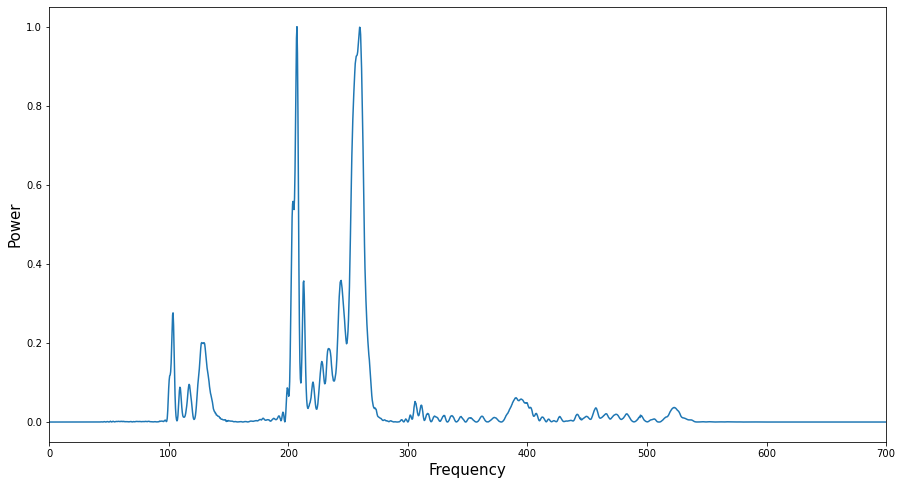

In [294]:
# Going into Fourier (frequency domain)
FFT_filtered      = np.fft.fft(audio_signal_filtered)  # fast fourier transform

# I plot the Power Spectrum of the modified recording and make sure that the filtered frequencies are gone
nyquist           = sample_rate / 2
x_freq            = np.linspace(0, nyquist, int(len(audio_signal_filtered)/2))
half_FFT          = FFT_filtered[:len(x_freq)]
complex_conjugate = np.conj(half_FFT)
power             = half_FFT * complex_conjugate

# Plot
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
ax.plot(x_freq, power / power.max())
ax.set_xlim(0, 700)
plt.xlabel('Frequency', size = 15)
plt.ylabel('Power', size = 15)
plt.show()

In [295]:
# I reproduce the result
Audio(audio_signal_filtered, rate = sample_rate)

In [296]:
# I save the .wav file
file_name = "Secret word from Joaquín Schlotthaer.wav"
wavfile.write(file_name, sample_rate, audio_signal_filtered)

### Part 2

- you will get the ".wav" file with a spoken word from your partner. Load it to JHUB. Load the file into a notebook using scipy. Play the recording using Audio class from IPython and try to recognise the word. Don't use Google Translate or other services to help you - it will ruin the project idea (don't ask your partner as well).
- next you need to make a picture of the recognised word. Just use the phone for that. Please make sure there is not many other objects on the picture and the background is not too noisy. Upload the picture with the object to JHUB.
- load the picture with numpy. Explore the dimensions, is it RGB or RGBa? If RGBa, convert to RGB.
- make a 2x3 figure: on the first row, plot separately Red, Green or Blue channels of the picture. Below on the second row, plot histograms for Red, Green and Blue channels respectively. How different are images on different channels? How different are the color distributions?
- convert picture to grayscale. Plot the histogram of the picture.
- now your goal is to remove certain intensities such that one can still see the object on the picture, but it's pretty hard to recognise the object. One can just set values in the certain range to 0 (black) or to maximum (white). Play around with removing different ranges such that it's still possible to see, but hard to recognize the object on the picture.
- plot the histogram of the modified picture and make sure filtered range of intensities is missing.
- apply gaussian blur (use sigma ~1/20 of the image width or length in pixels) to smooth the picture. Plot the result.
- threshold the picture to make it binary. Try different thresholds to make sure the object is still (but hardly) recognisable. Save the image as ".jpg", download it and give it to your partner.

In [297]:
# I load the file with the spoken word of my partner to JHUB

# Speficying the file location
audio_file_DING = "secret word from Ding Yang-2.wav"

# Loading the .wav file divided in sample rate and the file itself
sample_rate_D, audio_data_D = wavfile.read(audio_file_DING)

In [298]:
# Playing the recording using Audio from IPython
Audio(audio_data_D, rate = sample_rate_D)

#### Based on what I can hardly understand from the audio and the word that was given to me, I guess that my partner´s secret word is "king"

In [299]:
# Uploading the picture to JHUB using "imread" of the modul ".pyplot" in the package "matplotlib"
img = imread("king_pictureII.JPG")

# Checking its shape
img.shape

(1021, 698, 3)

#### After looking at the shape, I can tell it has 3 channels, which means it is RGB. I plot them separetely

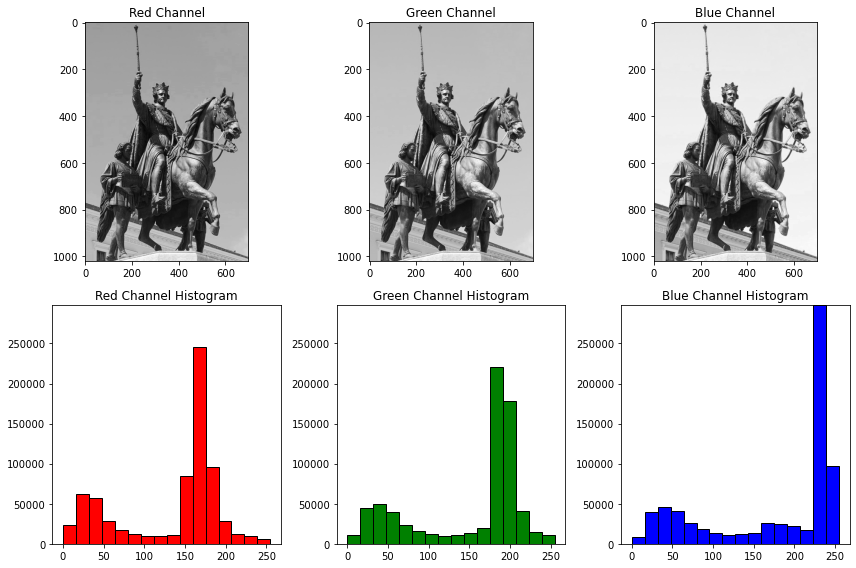

In [300]:
# I create a new variable for each channel: R, G and B
red_channel   = img[:,:,0]
green_channel = img[:,:,1]
blue_channel  = img[:,:,2]

# Specifiying the dimensions and the size of the plot
fig, axes = plt.subplots(2, 3, figsize = (12, 8))

# Plotting each channel on the first row
axes[0, 0].imshow(red_channel, cmap   = 'gray')
axes[0, 0].set_title('Red Channel')
axes[0, 1].imshow(green_channel, cmap = 'gray')
axes[0, 1].set_title('Green Channel')
axes[0, 2].imshow(blue_channel, cmap  = 'gray')
axes[0, 2].set_title('Blue Channel')

# And the histogram for each on the second row
red_hist = axes[1, 0].hist(red_channel.flatten(), bins = 16, color = "red", edgecolor = 'black')
axes[1, 0].set_title('Red Channel Histogram')

green_hist = axes[1, 1].hist(green_channel.flatten(), bins = 16, color = "green", edgecolor = 'black')
axes[1, 1].set_title('Green Channel Histogram')

blue_hist = axes[1, 2].hist(blue_channel.flatten(), bins = 16, color = "blue", edgecolor = 'black')
axes[1, 2].set_title('Blue Channel Histogram')

# Adjusting the scale on Y so each histogram has the same scale and therefore are easier to compare
max_value = max(red_hist[0].max(), green_hist[0].max(), blue_hist[0].max())
axes[1, 0].set_ylim(0, max_value)
axes[1, 1].set_ylim(0, max_value)
axes[1, 2].set_ylim(0, max_value)

# Adjusting the layout and plot the result
plt.tight_layout()
plt.show()

#### The three channels (R, G and B) have a similar pixel ratio in which, by a wide difference, the pixels of higher intensity are in higher proportion to those of darker tone, but it is the B channel where this disparity is most pronounced.

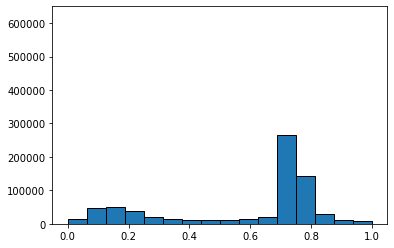

In [301]:
# I convert the original image to grayscale using "rgb2gray" of the modul ".color" in the package "skimage"
# and plot a histogram of it
img_gray = rgb2gray(img)

# Plotting the histogram with adjusted Y axis to make it easier to compare
plt.hist(img_gray.flatten(), bins = 16, edgecolor = 'black')
plt.ylim(0, 650000)
plt.show()

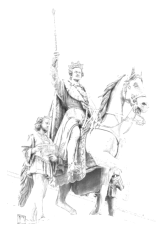

In [302]:
# I remove certain intensities to make the image harder to recognise using "exposure" of the package "skimage"

# Applying the filter in the selected range 
img_int_removed = exposure.rescale_intensity(img_gray, in_range=(0.0, 0.2))

# Displaying the manipulated image (with no axis)
plt.imshow(img_int_removed, cmap ='gray')
plt.axis('off')
plt.show()

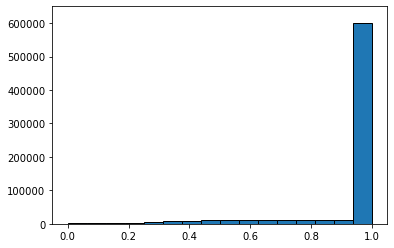

In [303]:
# I plot the histogram of the modified picture with adjusted Y axis to make it easier to compare
plt.hist(img_int_removed.flatten(), bins = 16, edgecolor = 'black')
plt.ylim(0, 650000)
plt.show()

In [304]:
# I check the size of the image in order to select the sigma value
img_int_removed.shape

(1021, 698)

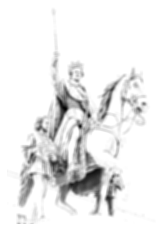

In [305]:
# I now apply a gaussian blur using "filters" of the package "skimage" to make the picture more smooth

# Aplying the filter (sigma = width/20)
img_smooth = filters.gaussian(img_int_removed, sigma = 34.9, truncate = 1/5)

# Plotting the new image
plt.imshow(img_smooth, cmap = 'gray')
plt.axis('off')
plt.show()

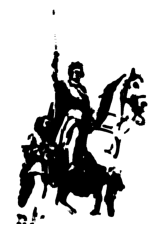

In [306]:
# Creating a matrix of zeros with the image shape
img_thresh = np.zeros(img_smooth.shape)

# Applying a threshold to change certain values to 1
img_thresh[img_smooth > 0.94] = 1

# Plotting the result
plt.imshow(img_thresh, cmap = 'gray')
plt.axis('off')
plt.show()

In [307]:
# Finally, I save the result as .jpg using "io" of the package "skimage"
io.imsave('JS_SecretWord_Picture.jpg', img_thresh)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


### Part 3

- you will get a picture from your partner. Look at the image and try to recognize which object is in the picture.
- in L1 we used the "shakespeare" file with all works from Shakespeare. Using the english word (name of the object from the picture) find all positions in the file where this word is used (use "startswith" while comparing words to get different forms). Don't forget to clean the text - remove special symbols, make words lowercase etc. to find all matches.
- using these positions, compute the density of the the word occurence along the whole text. Use histogram with the fixed binning (agree on the same binning with your partner, don't go with too many bins).
- save the occurence density as a numpy array (".npy" file) and send it to your partner.

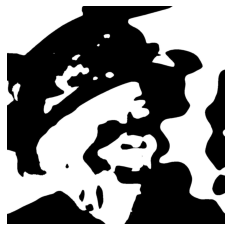

In [308]:
# Uploading the picture of my partner to JHUB
DY_SecretWord_Picture = imread("DY_SecretWord_Picture.jpeg")

# Plotting it
plt.imshow(DY_SecretWord_Picture, cmap = 'gray')
plt.axis('off')
plt.show()

#### I would say it is Elizabeth II, Queen of the United Kingdom, therefore the object word is "QUEEN"

In [309]:
# I load the Shakespeare´s text
with open('data/L1/shakespeare.txt', 'r') as f:
    text = f.read()

In [310]:
# Defining a function which argument is first convert to lower cases and then its symbols replaced for spaces
def clean_words(dirty_words):
    cleaned = dirty_words.lower()

    for symbol in ['.', ',', '\n', '\n\n', '[', ']', '(', ')', '?', '*']:
        cleaned = cleaned.replace(symbol, ' ')
        
    return cleaned

# Extracting all the words from the Shakespeare´s text
all_words = text.split(' ')

# Apliying the function to all the elements in the variable "all_words"
all_words = [clean_words(x) for x in all_words]

# Using a list comprehension to remove spaces and just keep the words
all_words = [x for x in all_words if not x == '']

In [311]:
# Checking the result using a random range of words
random.sample(all_words, 15)

['came',
 'pistol ',
 'gates',
 'flames',
 'is',
 'for',
 'be',
 'be',
 'love',
 'our',
 'did',
 'bastard ',
 'lusty',
 'go',
 'too']

In [312]:
# I look for all positions in the file where this word is used
queen_positions = []

# Obtaining every word with its index to be compared and saved if it fulfill the conditions
for idx, word in enumerate(all_words):
    if word.startswith("queen"):
        queen_positions.append(idx)

# Checking the amount of indices saved
len(queen_positions)

986

In [313]:
# I check if the indices belong to the searched word by randomly selecting 15 of them using the package "random"
queen_word = []
for idx in random.sample(queen_positions, 15):
    queen_word.append(all_words[idx])

queen_word

['queen; ',
 'queen',
 'queen',
 'queen',
 'queen',
 'queen! ',
 'queen',
 'queen',
 'queen ',
 'queen  ',
 'queen; ',
 'queen ',
 'queen',
 'queen  ',
 'queen']

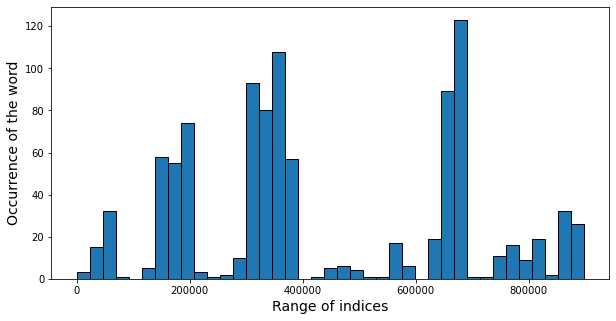

In [314]:
# I plot the word occurrence density in the text using a histogram
fig, ax = plt.subplots(1, 1, figsize = (10, 5))

# Setting the bins for the histogram by distribuiting the total amount of words in "all_words" in 40 units
bins = np.linspace(0, len(all_words), 40)

# Plotting the histogram with the appearance of the word "queen" in the previously set distribution
plt.hist(queen_positions, edgecolor = 'black', bins = bins)

ax.set_ylabel('Occurrence of the word', fontsize = 14)
ax.set_xlabel('Range of indices', fontsize = 14)
plt.show()

In [315]:
# I save the occurence density as a numpy array to send it to my partner

# Assigning two variables, one for the histogram itself and another one for the bins border (which is not of interest)
occurrence_JSword, _ = np.histogram(queen_positions, bins = 40)

# Saving the variable with the histogram as a Numpy array
np.save('occurrence_JSword.npy', occurrence_JSword)

## Part 4

- find all the positions of your original secret word in Shakespeare and compute occurence density along the whole text. Agree with your partner in advance about the binning (e.g. density with 30 bins).
- get the file with the densities from your parter. Read the file using numpy.
- now you should have two numpy arrays with word occurence densities of the same shape. Check the shapes and make sure they are identical.
- compute linear regression of the two distributions. Plot density of one word versus the other (use scatter plot). On top, plot the regression line. Is there a correlation between occurence of the words in the text? What is the correlation coefficient? Ask your partner - how different is his/her correlation coefficient?

In [316]:
# I read the file from my partner
occurrence_DYword = np.load('ding_yang_task3-2.npy')

In [317]:
# I check that both arrays have the same shape
occurrence_DYword.shape == occurrence_JSword.shape

True

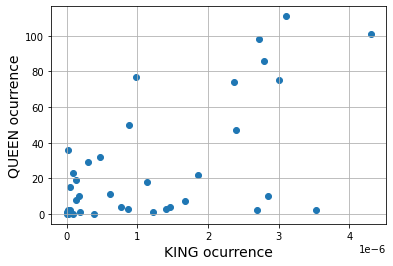

In [318]:
# I make a scatter plot of both
fig, ax = plt.subplots(1, 1)
plt.scatter(occurrence_DYword, occurrence_JSword)
ax.set_ylabel('QUEEN ocurrence', fontsize = 14)
ax.set_xlabel('KING ocurrence', fontsize = 14)
plt.grid()
plt.show()

In [319]:
# I run a linear regression between both using "stats" from the package "scipy" and save the values obtained
slope, intercept, r, p, se = stats.linregress(occurrence_DYword, occurrence_JSword)

# Checking the regression values
slope, intercept, r, p, se

(16794248.024957325,
 5.850335347574482,
 0.6238423068741824,
 1.7013402615864735e-05,
 3413114.366917188)

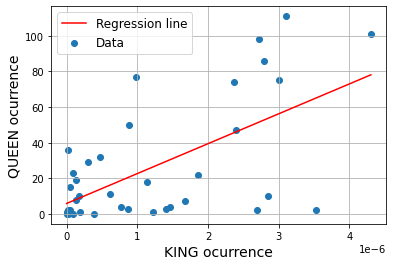

In [320]:
# I plot the linear regression together with the scatter plot

# Creating the regression line function
reg_line = lambda x: slope * x + intercept

# Generating the values for the regression line plot
x_vals = np.linspace(min(occurrence_DYword), max(occurrence_DYword))
y_vals = np.array([reg_line(x) for x in x_vals])

# Setting the plot parameters
fig, ax = plt.subplots(1, 1)

# Regression line
ax.plot(x_vals, y_vals, label = "Regression line", color = "red")

# Scatter plot
ax.scatter(occurrence_DYword, occurrence_JSword, label = "Data")

ax.set_ylabel('QUEEN ocurrence', fontsize = 14)
ax.set_xlabel('KING ocurrence', fontsize = 14)
plt.legend(loc = 'upper left', fontsize = 'large', fancybox = True)
plt.grid()
plt.show()

#### Given the correlation (r = 0.62) and significance (p = 1.70e-05) values obtained after running the regression, I can say that exist a positive correlation between the ocurrence of both words in Shakespeare´s text, and that such is statistically significant.

### Part 5

- Using GitLab, fork the Ping-Pong project repository to your account: https://gitlab.lrz.de/asobolev/ping-pong
- clone the repository locally on your computer using Git.
- download the jupyter notebook with the code that does Part 1 - 3 (File -> Download as -> Notebook, or just select the file and use download button above in the JHUB File browser). You will (most probably) download a ".json" file. If so, rename it back to ".ipynb".
- download all other files that you used in the notebook as well.
- create a folder that has the same name as your JHUB login (e.g. "rendall") inside the repository folder.
- put all downloaded files to your folder within the repository.
- add files to git, commit changes and push changes to the server.
- create a merge request to synchronize your work with the main project repository.